In [97]:
import pandas as pd

train=pd.read_csv("../titanic/train.csv")
test=pd.read_csv("../titanic/test.csv")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [98]:
# Age 결측값 처리

train['NameTitle'] = ""
for i in range(0,891):
    train['NameTitle'][i] = train.Name[i].split(",")[1].split(".")[0].replace(" ","")
fill=train.groupby('NameTitle')['Age'].transform('median')  # 호칭의 중간값으로 빈 나이 설정
train['Age'].fillna(fill, inplace=True)

test['NameTitle'] = ""
for i in range(0,418):
    test['NameTitle'][i] = test.Name[i].split(",")[1].split(".")[0].replace(" ","")
fill=train.groupby('NameTitle')['Age'].transform('median')  # 호칭의 중간값으로 빈 나이 설정 (트레인데이터의 중앙값)
test['Age'].fillna(fill, inplace=True)

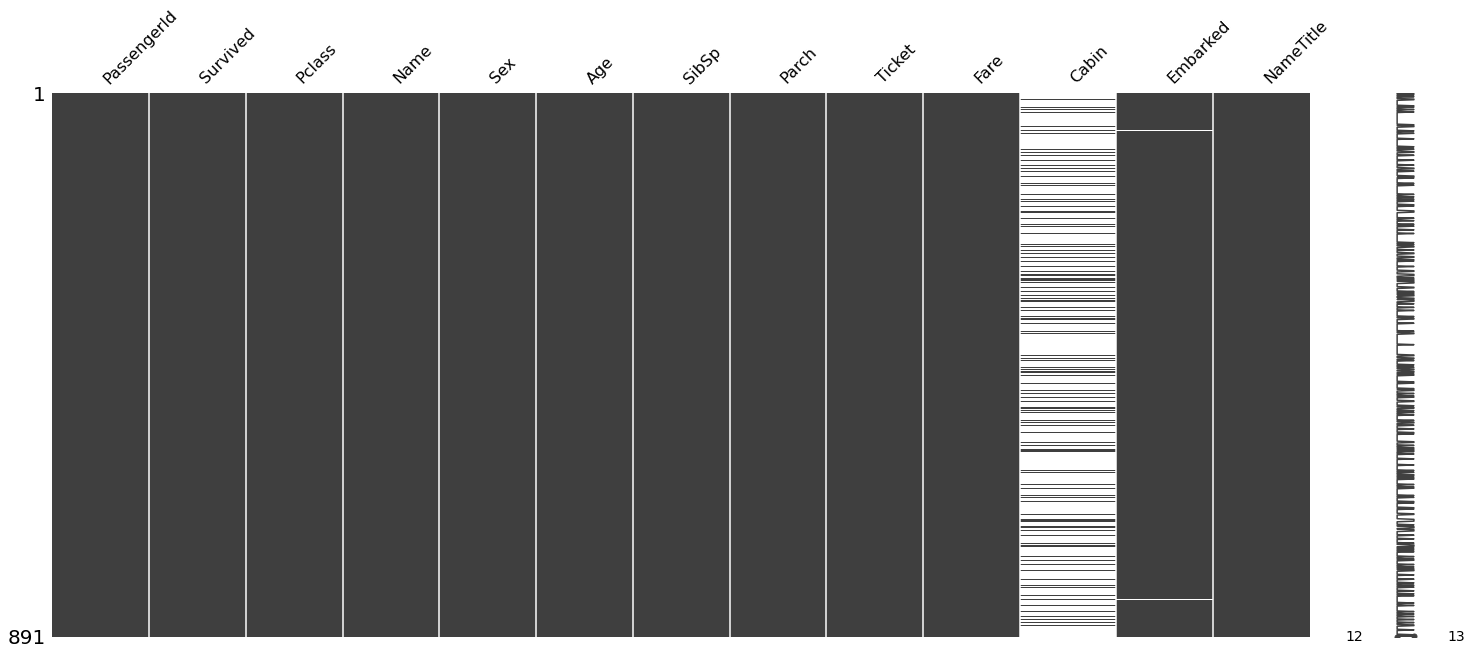

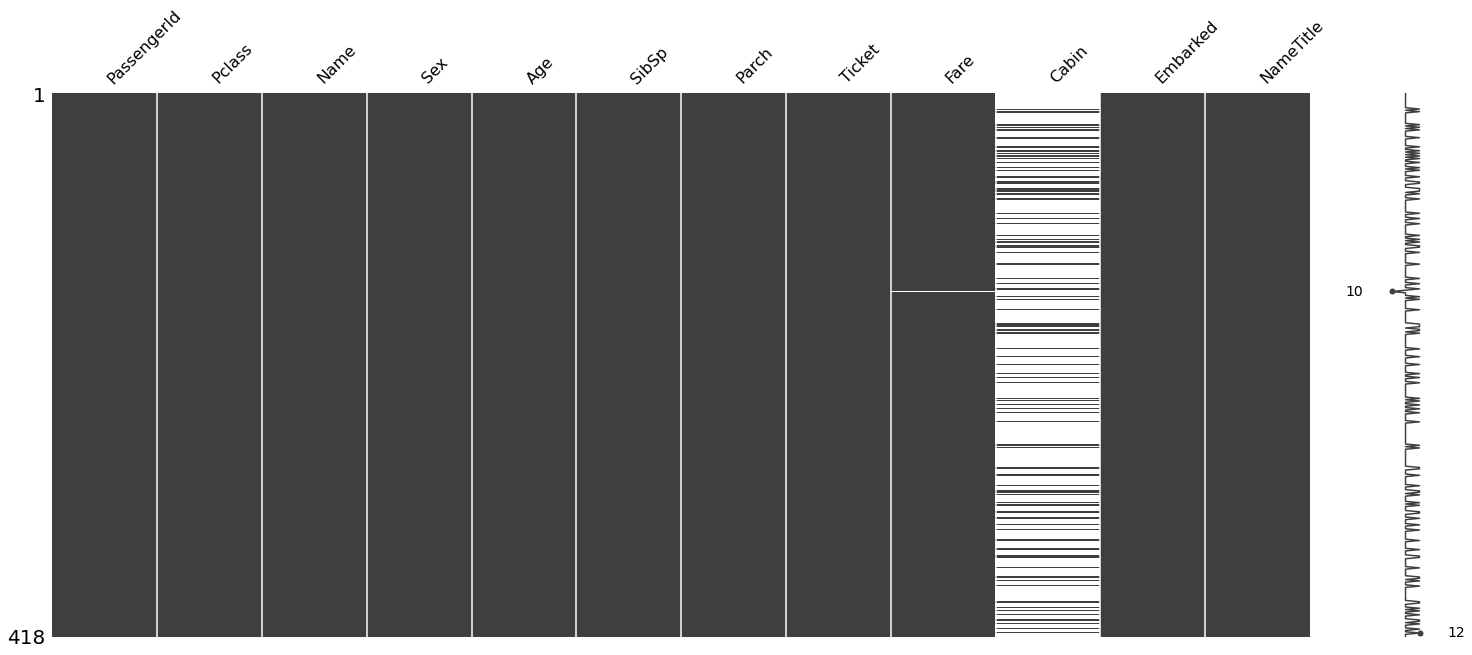

In [99]:
import missingno as msno
msno.matrix(train) #흰색이 결측치
msno.matrix(test) #흰색이 결측치

In [63]:
train.groupby('NameTitle').Age.mean()

NameTitle
Capt           70.000000
Col            58.000000
Don            40.000000
Dr             42.000000
Jonkheer       38.000000
Lady           48.000000
Major          48.500000
Master          4.574167
Miss           21.773973
Mlle           24.000000
Mme            24.000000
Mr             32.368090
Mrs            35.898148
Ms             28.000000
Rev            43.166667
Sir            49.000000
theCountess    33.000000
Name: Age, dtype: float64

In [100]:
# Gender 열 생성
train['Sex'].value_counts()
train['Gender'] = (train['Sex']=='female')
test['Gender'] = (test['Sex']=='female')

# Sex 컬럼 원핫 인코딩
# train['Sex'].apply(적용하고자 하는 함수)
# train['Sex'] = train['Sex'].apply(lambda x : 1 if x=='female' else 0)
# test['Sex'] = test['Sex'].apply(lambda x : 1 if x=='female' else 0)

# Embarked 컬럼 원핫인코딩
# train['Embarked'].apply(적용하고자 하는 함수)
# train['Embarked_C'] = train['Embarked'].apply(lambda x : True if x=='C' else False)
# train['Embarked_S'] = train['Embarked'].apply(lambda x : True if x=='S' else False)
# train['Embarked_Q'] = train['Embarked'].apply(lambda x : True if x=='Q' else False)
# test['Embarked_S'] = test['Embarked'] == 'S'
# test['Embarked_C'] = test['Embarked'] == 'C'
# test['Embarked_Q'] = test['Embarked'] == 'Q'

# 결측치 확인
# import missingno as msno
# msno.matrix(train) #흰색이 결측치
# msno.matrix(test) #흰색이 결측치

# get_dummies 이용한 원핫인코딩 함수
def myData(data,col):
    #print(data[col])
    for c in col:
        data = pd.concat([data,pd.get_dummies(data[c], prefix=c)], axis=1)
        data = data.drop(c,axis=1)
    return data

# Pclass / Embarked 컬럼 원핫인코딩
train['Pclass'].value_counts()
train['Pclass'] = train['Pclass'].astype('category')
test['Pclass'] = test['Pclass'].astype('category')
col = ["Pclass","Embarked"] # 2개열만 원핫인코딩
train = myData(train,col) # mydata 함수 적용
test = myData(test,col)

# age 결측치 처리
train['Age_mean'] = train['Age']
train['Age_mean'].isnull().sum()
train['Age_mean'].fillna(train['Age'].mean(),inplace=True)
test['Age_mean'] = test['Age']
test['Age_mean'].isnull().sum()
test['Age_mean'].fillna(test['Age'].mean(),inplace=True)

# FamilySize 컬럼 생성및 원핫인코딩
train['FamilySize'] = train['SibSp']+train['Parch']+1 #같이 승선한 가족의 수
train['Family'] = train['FamilySize']
train.loc[train['FamilySize']==1, 'Family']='S'
train.loc[(train['FamilySize']>1) & (train['FamilySize']<5), 'Family']='M'
train.loc[train['FamilySize']>=5, 'Family']='L'
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'
test['FamilySize'] = test['SibSp']+test['Parch']+1 #같이 승선한 가족의 수
test['Family'] = test['FamilySize']
test.loc[test['FamilySize']==1, 'Family']='S'
test.loc[(test['FamilySize']>1) & (test['FamilySize']<5), 'Family']='M'
test.loc[test['FamilySize']>=5, 'Family']='L'
test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [ ]:
# 데이터 수집 -> 전처리(EDA, 특성공학, 표준화/정규화, 결측값 처리, 상관분석->알고리즘 선택(knn,kmeans, svm, dt, nn, dnn, cnn, rnn, rf...->모델링->모델평가 ->모델개선->완성된 모델 ->예측.분류작업))

#상관분석을 할때는 주로
#연속형 : 피어슨 상관계수
#범주형 : 켄달,스피어만 상관계수

#모델: 입력데이터가 들어오면 결과를 출력을 하는 것  입력-모델-출력 
# feature naems= fn 

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  NameTitle    891 non-null    object 
 11  Gender       891 non-null    bool   
 12  Age_mean     891 non-null    float64
 13  FamilySize   891 non-null    int64  
 14  Family       891 non-null    object 
 15  Family_S     891 non-null    bool   
 16  Family_M     891 non-null    bool   
 17  Family_L     891 non-null    bool   
 18  Pclass_1     891 non-null    uint8  
 19  Pclass_2

In [154]:
fn=['Gender', 'Age','Family_S','Embarked_S','Embarked_Q','Embarked_C','Pclass_1','Pclass_2','Pclass_3']
xTrain=train[fn]
xTrain.head()
yLabel=train['Survived']

In [155]:
from sklearn.tree import DecisionTreeClassifier # scikit-learn.org/stable/search.html?q=DecisionTreeClassifier
# 모델 객체 생성
model = DecisionTreeClassifier(max_depth=4, random_state=2020) 
# 모델링
model.fit(xTrain,yLabel)

DecisionTreeClassifier(max_depth=5, random_state=2020)

In [156]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
# 교차검증을 하는 이유 : 아직 본 적 없는 데이터에 대해 성능을 얘측
#                      더 좋은 모델을 위한 퍼러미터 튜닝을 위해

# KFold 객체 만들기
# 전체 데이터를 10겹으로 분리, 9겹은 트레이닝, 1겹은 테스트용으로 쓴다.
kfold = KFold(n_splits=10, # 몇겹으로 나눌거냐
                shuffle=True, # 섞을거냐
                random_state=2020) #랜덤시드
# cv=kfold 에 대한 정확도 측정 (10개가 나옴)
score = cross_val_score(model, xTrain, yLabel, cv=kfold, n_jobs=-1, scoring='accuracy')
print(score)
round(np.mean(score)*100,2)

[0.87777778 0.68539326 0.82022472 0.79775281 0.7752809  0.7752809
 0.87640449 0.86516854 0.82022472 0.84269663]


81.36

In [157]:
fn=['Gender', 'Age','Family_S','Embarked_S','Embarked_Q','Embarked_C','Pclass_1','Pclass_2','Pclass_3']
xTest=test[fn]
xTest.head()

,Gender,Age,Family_S,Embarked_S,Embarked_Q,Embarked_C,Pclass_1,Pclass_2,Pclass_3
0,False,34.5,True,0,1,0,0,0,1
1,True,47.0,False,1,0,0,0,0,1
2,False,62.0,True,0,1,0,0,1,0
3,False,27.0,True,1,0,0,0,0,1
4,True,22.0,False,1,0,0,0,0,1


In [158]:
# 예측결과
prediction = model.predict(xTest)
test['Survived'] = prediction

In [159]:
# 예측결과 저장
res = test[['PassengerId','Survived']]
res.to_csv("titanic_submission2.csv", index=False)